# *Importing Librarie*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import streamlit as st

# *Importing Dataset*

In [2]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


# *EDA*

In [3]:
df.shape

(2011, 7)

In [4]:
# Displaying First few rows

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [5]:
# Displaying Last few rows

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [8]:
# Displaying Summary

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [9]:
# Checking for missing values in dataset

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Checking for Duplicated values in dataset

df.duplicated().sum()

0

In [11]:
# Checking dtypes of Columns

df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
# Coverting Date Column to Datetime

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace = True)

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# *Data Visualisation*

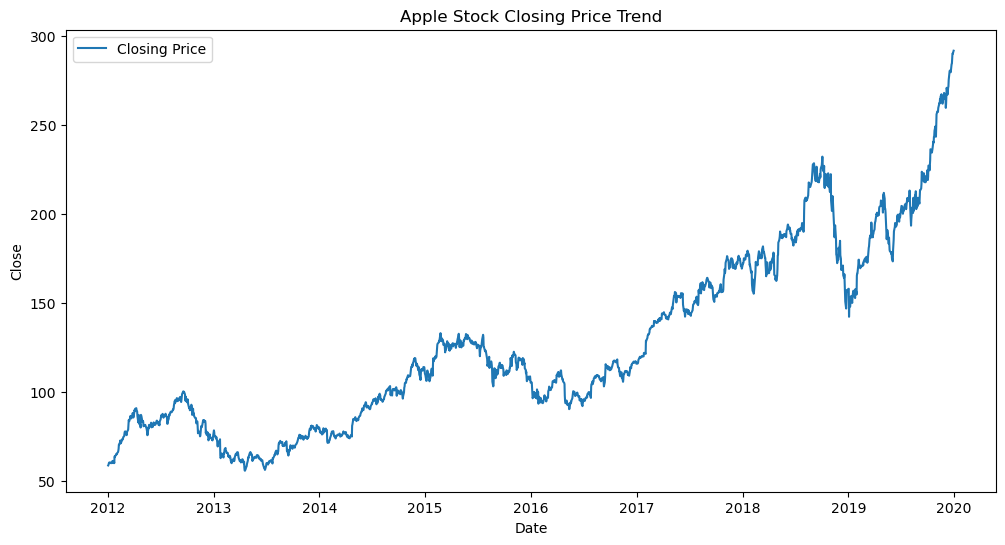

In [14]:
# Lineplot

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close', label='Closing Price')
plt.title('Apple Stock Closing Price Trend')
plt.legend()
plt.show()

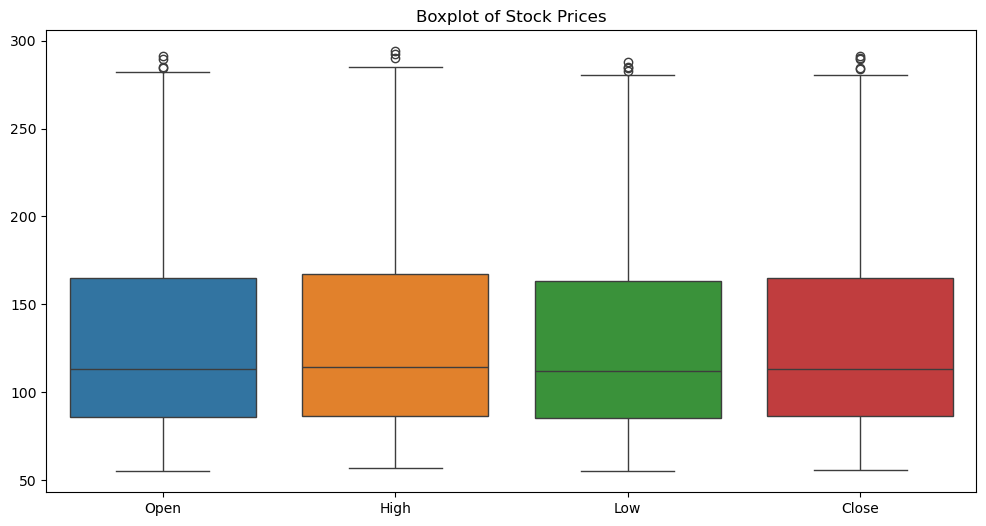

In [15]:
# Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Stock Prices')
plt.show()

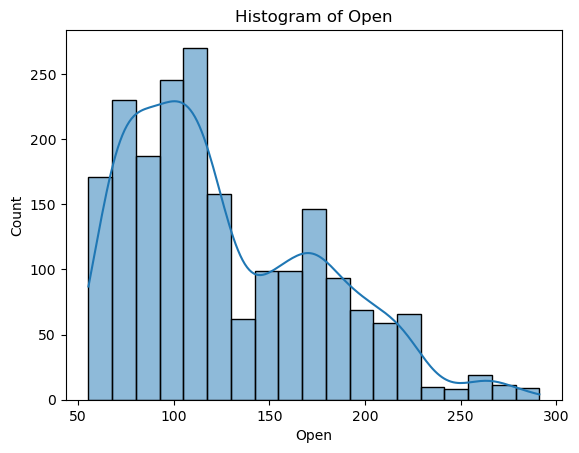

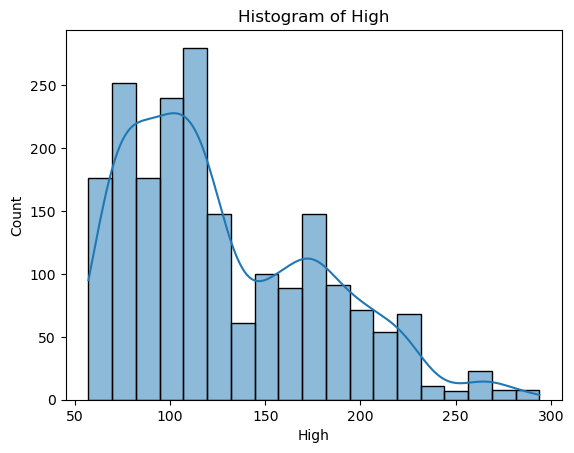

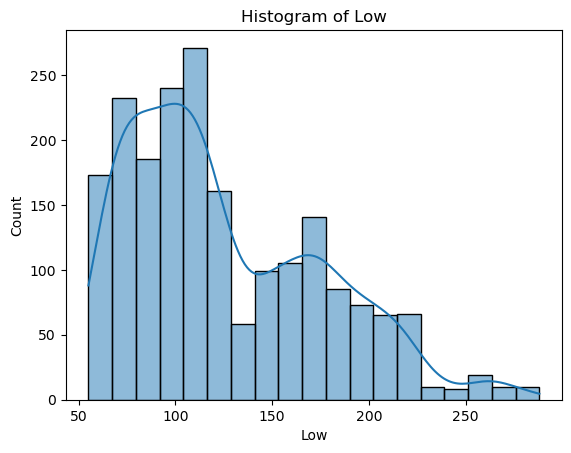

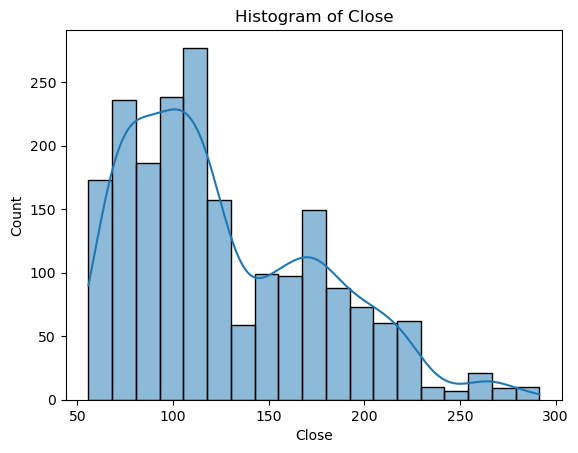

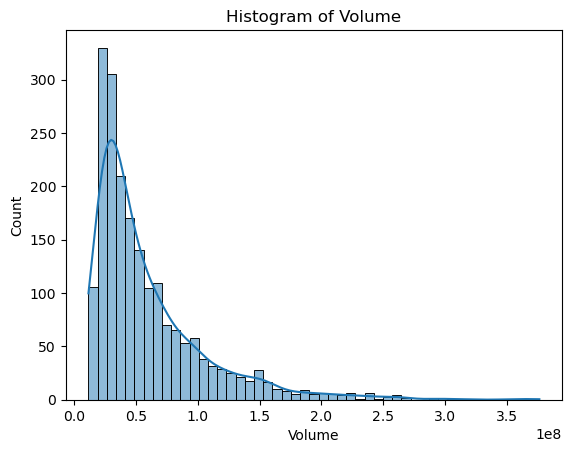

In [16]:
#Histogram

selec_cols = ['Open', 'High' , 'Low', 'Close', 'Volume']

for col in selec_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

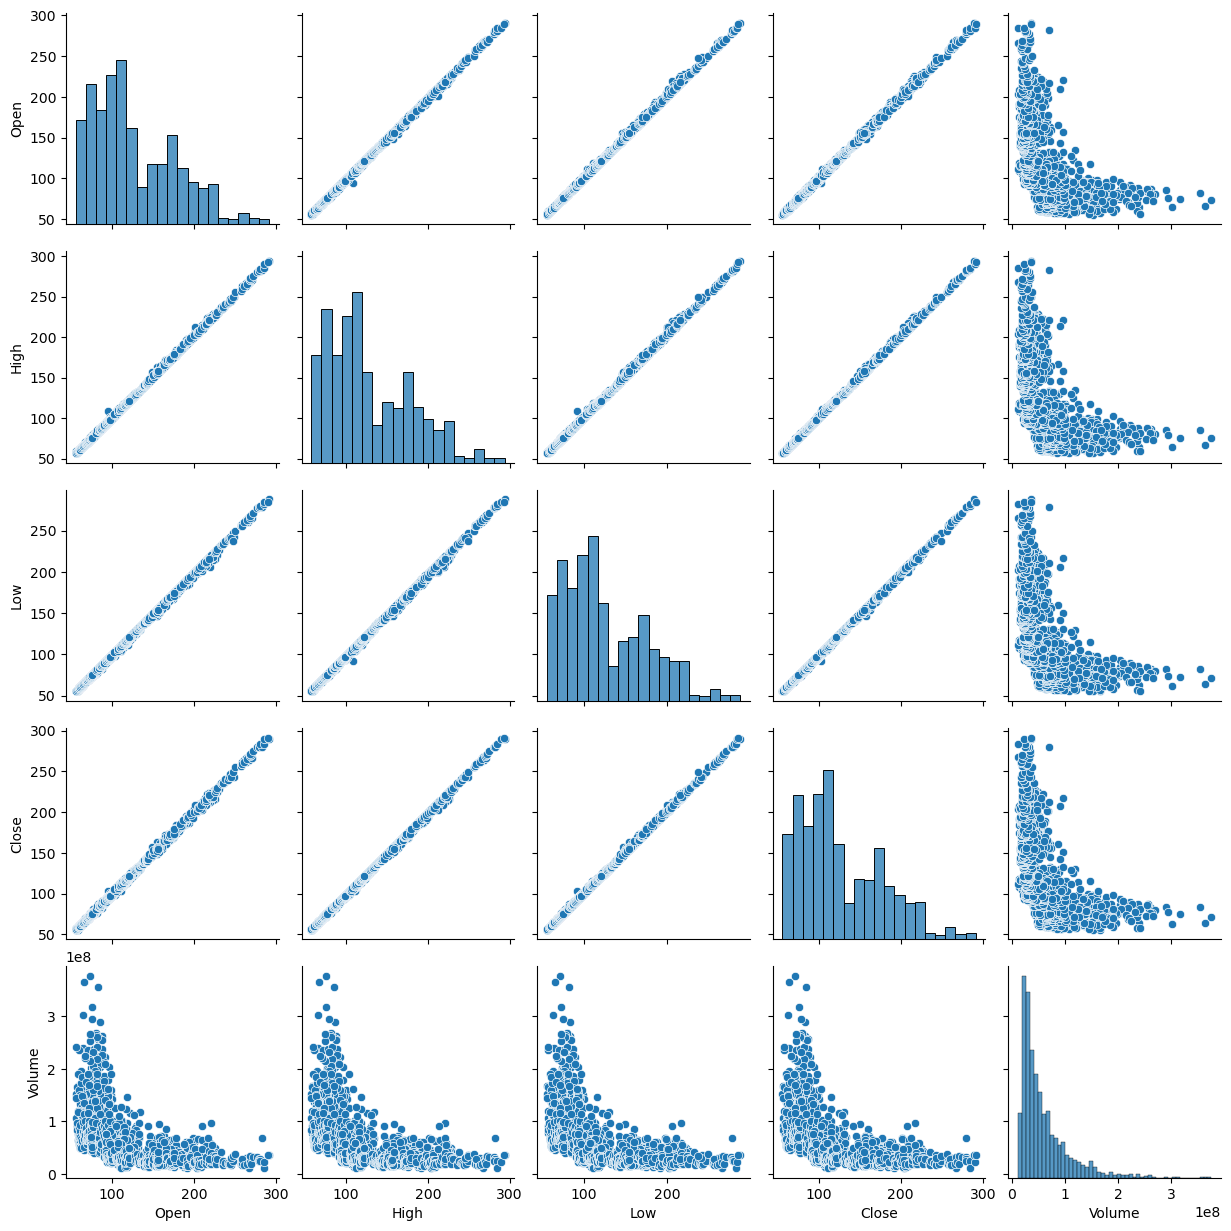

In [17]:
# Pairplot

sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

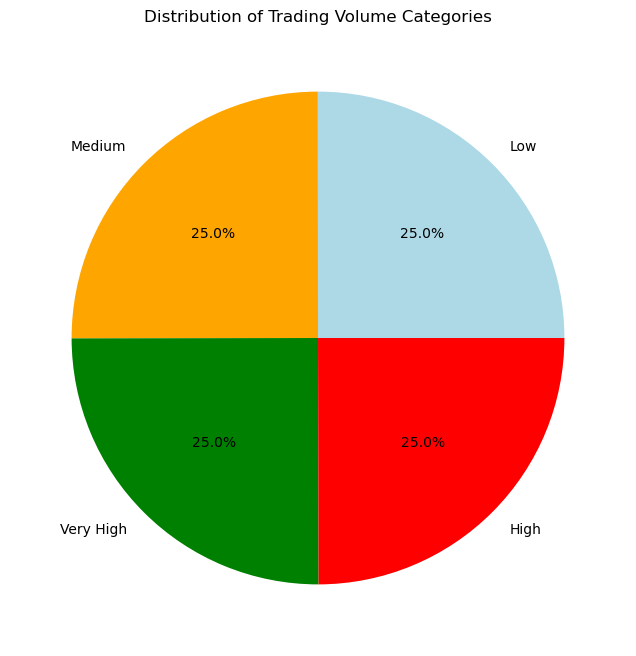

In [18]:
# Pie chart for volume distribution based on quartiles
volume_quartiles = pd.qcut(df['Volume'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
volume_counts = volume_quartiles.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(volume_counts, labels=volume_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange', 'green', 'red'])
plt.title("Distribution of Trading Volume Categories")
plt.show()

In [19]:
# Function to remove outliers using IQR

def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

In [20]:
outlier_Detection(df,['Open', 'High', 'Low', 'Close', 'Volume'])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200.0
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400.0
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200.0
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100.0
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,283.809289,282.054138,24643000.0
2019-12-24,284.150718,284.890015,280.977848,283.809289,282.322266,12119700.0
2019-12-26,284.150718,288.448204,280.977848,283.809289,287.923645,23280300.0


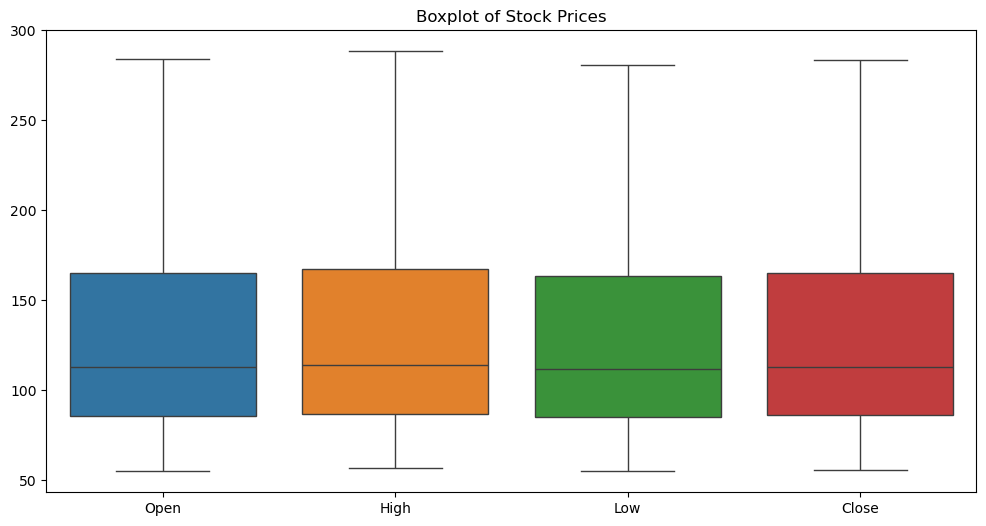

In [21]:
# Boxplot after treating Outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Stock Prices')
plt.show()

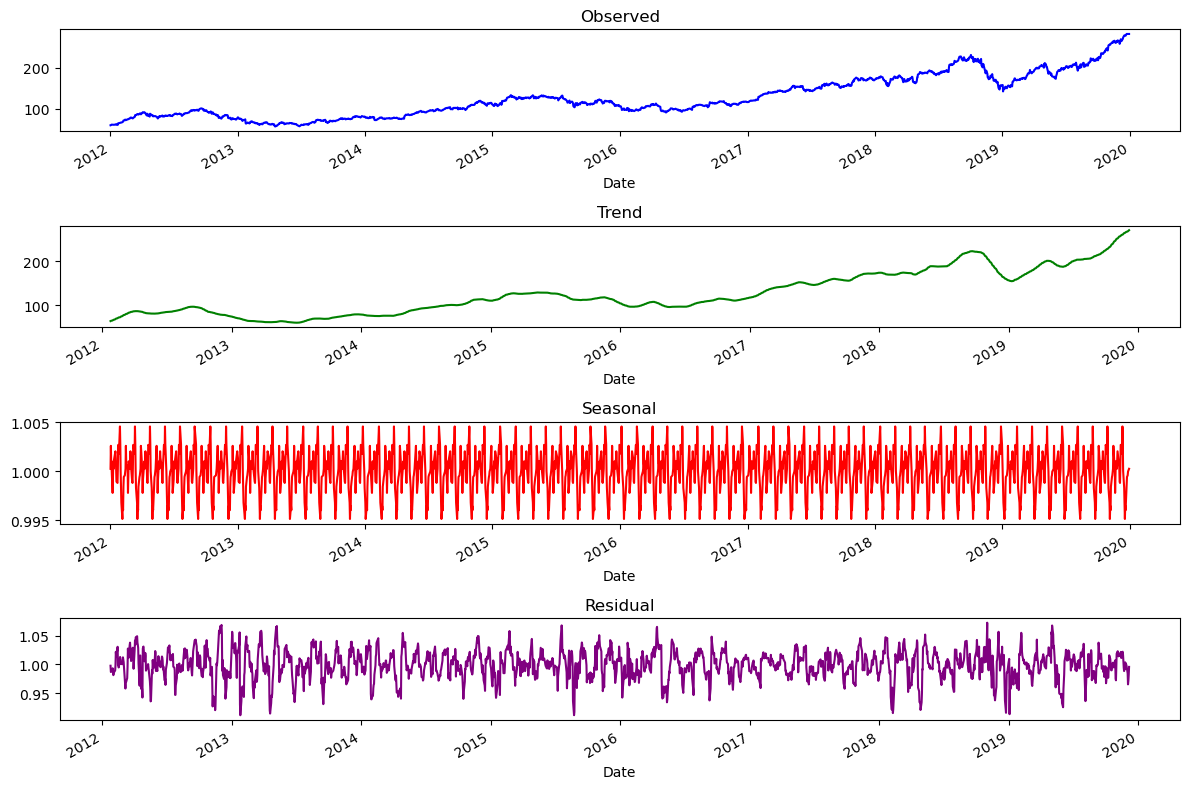

In [22]:
# Decomposing the Time Series

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig, axes = plt.subplots(4, 1, figsize=(12, 8))  # Increase figure size

decomposition.observed.plot(ax=axes[0], title='Observed', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='red')
decomposition.resid.plot(ax=axes[3], title='Residual', color='purple')

plt.tight_layout()
plt.show()


# *Featuer Engineering*

In [23]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['Volatility'] = df['Close'].rolling(window=10).std()
df['Momentum'] = df['Close'] - df['Close'].shift(3)

MA7 (7-day Moving Average)
It calculates the average closing price over the last 5 days.
Helps smooth short-term fluctuations and identify trends.

Volatility 
Measures how much the stock price fluctuates over 10 days.
High volatility means frequent price changes; low volatility means stable prices.

Momentum 
Measures the difference between today's price and the price 5 days ago.
Positive momentum → price increasing, negative momentum → price decreasing.

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA7,Volatility,Momentum
Date,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200.0,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500.0,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400.0,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200.0,NaN,NaN,1.595714
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100.0,NaN,NaN,1.184284


In [25]:
# Dropping Nan values after featuer extraction

df.dropna(inplace=True)

In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA7,Volatility,Momentum
Date,,,,,,,,,
2012-01-17,60.599998,60.855713,60.422855,60.671429,52.428562,60724300.0,60.322857,0.627089,0.307144
2012-01-18,60.994286,61.352856,60.900002,61.301430,52.972977,69197800.0,60.459796,0.588672,1.102860
2012-01-19,61.450001,61.624287,60.930000,61.107143,52.805092,65434600.0,60.582653,0.481957,1.134285
2012-01-20,61.070000,61.071430,59.964287,60.042858,51.885387,103493600.0,60.522653,0.436924,-0.628571
2012-01-23,60.381428,61.207142,60.328571,61.058571,52.763115,76515600.0,60.621837,0.470875,-0.242859


# *Model Selection and Evaluation*

In [27]:
# Select the target variable

prices = df[['Close']].values

In [28]:
# Normalize data 

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [29]:
# Create sequences for LSTM

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 50  # Lookback period
x, y = create_sequences(prices_scaled, seq_length)

In [30]:
# Train test and Split

train_size = int(len(x) * 0.8)
xtrain, xtest = x[:train_size], x[train_size:]
ytrain, ytest = y[:train_size], y[train_size:]

In [31]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])    

In [32]:
# Compile Model

model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train Model

model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_data=(xtest, ytest), verbose=1)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0278 - val_loss: 0.0025
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.5559e-04 - val_loss: 0.0015
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.2627e-04 - val_loss: 0.0016
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.3782e-04 - val_loss: 0.0013
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.7641e-04 - val_loss: 0.0017
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.3778e-04 - val_loss: 0.0018
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.6396e-04 - val_loss: 0.0021
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.9000e-04 - val_loss: 0.0019
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9368e-04 - val_loss: 0.0021
Epoch 12/50
49/49 ━━━━━━━━━━━━━

### LSTM Model

In [34]:
y_pred_scaled = model.predict(xtest)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(ytest.reshape(-1, 1))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [35]:
# Model Evaluation for LSTM

lstm_mae = mean_absolute_error(y_test_actual, y_pred)
lstm_r2 = r2_score(y_test_actual, y_pred)
print("LSTM MAE:", lstm_mae)
print("LSTM R²:", lstm_r2)

LSTM MAE: 3.677346688346691
LSTM R²: 0.9723523905325467


### ARIMA Model

In [36]:
arima_model = ARIMA(df['Close'], order=(5,1,0))
arima_fit = arima_model.fit()

### SARIMA Model

In [37]:
sarima_model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

In [38]:
# Prepare Features for Machine Learning Models

features = ['Open', 'High', 'Low', 'Volume']
scaler_ml = StandardScaler()
x_scaled = scaler_ml.fit_transform(df[features])

In [39]:
# Train-Test Split for ML Models

train_size_ml = int(len(df) * 0.8)
x_train_ml, X_test_ml = x_scaled[:train_size_ml], x_scaled[train_size_ml:]
y_train_ml, y_test_ml = df['Close'][:train_size_ml], df['Close'][train_size_ml:]

### Random Forest Model

In [40]:
rf = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5)
rf.fit(x_train_ml, y_train_ml)
predictions_rf = rf.predict(X_test_ml)
rf_mae = mean_absolute_error(y_test_ml, predictions_rf)
rf_r2 = r2_score(y_test_ml, predictions_rf)
print("Random Forest MAE:", rf_mae)
print("Random Forest R²:", rf_r2)

Random Forest MAE: 21.087331800459115
Random Forest R²: -0.15604319513779186


### XGBoost Model

In [41]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=10)
xgb.fit(x_train_ml, y_train_ml)
predictions_xgb = xgb.predict(X_test_ml)
xgb_mae = mean_absolute_error(y_test_ml, predictions_xgb)
xgb_r2 = r2_score(y_test_ml, predictions_xgb)
print("XGBoost MAE:", xgb_mae)
print("XGBoost R²:", xgb_r2)

XGBoost MAE: 22.130735473978625
XGBoost R²: -0.2252464643374248


### Comparing Models

In [42]:
best_model = min([(lstm_mae, "LSTM"), (rf_mae, "Random Forest"), (xgb_mae, "XGBoost")])[1]
print(f"Best Performing Model: {best_model}")

Best Performing Model: LSTM


In [43]:
best_model = "LSTM" 

# Deployment

In [44]:
import streamlit as st
import pickle

In [45]:
# Saving trained models

pickle.dump(model, open("lstm_model.pkl", "wb"))  # Save LSTM
pickle.dump(rf, open("rf_model.pkl", "wb"))       # Save Random Forest
pickle.dump(xgb, open("xgb_model.pkl", "wb"))     # Save XGBoost

print("Models saved successfully!")

Models saved successfully!


In [46]:
# Saving this script as a Python file

script_content = """import streamlit as st\nimport numpy as np\nimport pickle\n\n# Load trained models\ntry:\n    model = pickle.load(open('lstm_model.pkl', 'rb'))  # LSTM\n    rf = pickle.load(open('rf_model.pkl', 'rb'))       # Random Forest\n    xgb = pickle.load(open('xgb_model.pkl', 'rb'))     # XGBoost\n    best_model = 'LSTM'  # Set dynamically based on evaluation\nexcept FileNotFoundError:\n    st.error('Model files not found. Please train and save models first.')\n    st.stop()\n\n# Dummy Test Data (Replace with actual test data preprocessing)\nX_test = np.random.rand(30, 50, 1)  # For LSTM\nX_test_ml = np.random.rand(30, 4)   # For RF & XGB\n\ndef predict_best_model():\n    if best_model == 'LSTM':\n        return model.predict(X_test)\n    elif best_model == 'Random Forest':\n        return rf.predict(X_test_ml)\n    elif best_model == 'XGBoost':\n        return xgb.predict(X_test_ml)\n    else:\n        return 'No valid model selected.'\n\n# Streamlit Web App\ndef app():\n    st.title('Apple Stock Price Prediction - Best Model')\n    user_input_date = st.date_input('Select Prediction Start Date')\n    forecast_days = st.number_input('Number of Days to Predict', min_value=1, max_value=60, value=30)\n    \n    if st.button('Predict'):\n        future_predictions = predict_best_model()\n        st.write(f'Predicted Closing Prices for Next {forecast_days} Days ({best_model}):', future_predictions)\n    \nif __name__ == '__main__':\n    app()"""


In [47]:
# Saving the script to a Python file

with open("deployment_best_model.py", "w") as f:
    f.write(script_content)

st.success("Deployment script saved as deployment_best_model.py. You can now run it using 'streamlit run deployment_best_model.py'")


2025-03-23 23:46:18.828 
  command:

    streamlit run C:\Users\omgos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [48]:
# Loading the trained models

try:
    model = pickle.load(open("lstm_model.pkl", "rb"))  # LSTM
    rf = pickle.load(open("rf_model.pkl", "rb"))       # Random Forest
    xgb = pickle.load(open("xgb_model.pkl", "rb"))     # XGBoost
    best_model = "LSTM"  # Set dynamically based on evaluation
except FileNotFoundError:
    st.error("Model files not found. Please train and save models first.")
    st.stop()

In [49]:
# Dummy Test Data (Replace with actual test data preprocessing)

X_test = np.random.rand(30, 50, 1)  # For LSTM
X_test_ml = np.random.rand(30, 4)   # For RF & XGB

def predict_best_model():
    if best_model == "LSTM":
        return model.predict(X_test)
    elif best_model == "Random Forest":
        return rf.predict(X_test_ml)
    elif best_model == "XGBoost":
        return xgb.predict(X_test_ml)
    else:
        return "No valid model selected."

In [50]:
# Streamlit Web App

def app():
    st.title("Apple Stock Price Prediction - Best Model")
    user_input_date = st.date_input("Select Prediction Start Date")
    forecast_days = st.number_input("Number of Days to Predict", min_value=1, max_value=60, value=30)
    
    if st.button("Predict"):
        future_predictions = predict_best_model()
        st.write(f"Predicted Closing Prices for Next {forecast_days} Days ({best_model}):", future_predictions)
    
if __name__ == "__main__":
    app()


2025-03-23 23:46:19.278 Session state does not function when running a script without `streamlit run`
